<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/LabFis4Espectroscopia_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV Prática 08 -09 : Espectrocopia I e II

In [ ]:
#!curl -o espectroscopio1.xlsx https://raw.githubusercontent.com/LabFis04/main/Grupos/espectroscopio1.xlsx

In [ ]:
#!ls -lah
     

In [ ]:
# Fonte - ex.: Mercurio - Hg
Theta_ref1 =176 #graus - espectroscopio 1
Theta_ref2 =347 #graus - espectroscopio 2
Theta_ref3 =256 #graus - espectroscopio 3


In [ ]:
#Alinhamento
x_d_1=168.5
x_e_1=183.3

x_d_2=339.7
x_e_2=354.4

x_d_3=263.5
x_e_3=248.6

theta_i_d_1 = abs(Theta_ref1-x_d_1)
theta_i_e_1 = abs(Theta_ref1-x_e_1)
a_esp1=abs(theta_i_d_1-theta_i_e_1)
print("theta_i_d_1:", theta_i_d_1,"; ","theta_i_e_1:",  np.round(theta_i_e_1,1),"; ","Alinhamento do Esp. 1:",  np.round(a_esp1, 2 ),".")

theta_i_d_2 = abs(Theta_ref2-x_d_2)
theta_i_e_2 = abs(Theta_ref2-x_e_2)
a_esp2=abs(theta_i_d_2-theta_i_e_2)
print("theta_i_d_2:", np.round(theta_i_d_2,1),"; ","theta_i_e_2:",  np.round(theta_i_e_2,1),"; ","Alinhamento do Esp. 2:",  np.round(a_esp2, 2 ),".")

theta_i_d_3 = abs(Theta_ref3-x_d_3)
theta_i_e_3 = abs(Theta_ref3-x_e_3)
a_esp3=abs(theta_i_d_3-theta_i_e_3)
print("theta_i_d_3:", theta_i_d_3,"; ","theta_i_e_3:", np.round(theta_i_e_3,1),"; ","Alinhamento do Esp. 3:",  np.round(a_esp3, 2 ),".")

theta_i_d_1: 7.5 ;  theta_i_e_1: 7.3 ;  Alinhamento do Esp. 1: 0.2 .
theta_i_d_2: 7.3 ;  theta_i_e_2: 7.4 ;  Alinhamento do Esp. 2: 0.1 .
theta_i_d_3: 7.5 ;  theta_i_e_3: 7.4 ;  Alinhamento do Esp. 3: 0.1 .


In [ ]:
#dataset = pd.read_excel("espectroscopio1.xlsx", sheet_name="Sheet1", usecols=[0,1,2], nrows=8, index_col=0, names=["Índice", "X", "Y"] ) #importação dos dados 
dataset = pd.read_excel("espectroscopio1.xlsx" ) #importação dos dados 


In [ ]:

xdata=dataset['X'] # sen(theta)
ydata=dataset['Y'] # Comprimento de onda (Angtrom)

In [ ]:
xbar = np.mean(xdata) # cálculo da média de xdata
ybar = np.mean(ydata)  # cálculo da média de ydata


a = np.sum(xdata*(ydata-ybar))/np.sum(xdata*(xdata-xbar)) #coef. angular estimado
b = ybar - a*xbar #coeficiente linear estimado


yest = a*xdata + b # função estimada

R_squared = np.sum((yest-ybar)**2)/np.sum((ydata-ybar)**2) #coef. de determinação
print("R_squared =",R_squared)
print("coef. angular (a): ", np.round(a,2))
print("coeficiente linear (b): ", np.round(b,2))
print("Equação da reta: y=",np.round(a,2),"*x +", np.round(b,2))

R_squared = 0.8306952104831069
coef. angular (a):  -1156.21
coeficiente linear (b):  5662.69
Equação da reta: y= -1156.21 *x + 5662.69


Equação da reta: y= -1156.21 *x + 5662.69


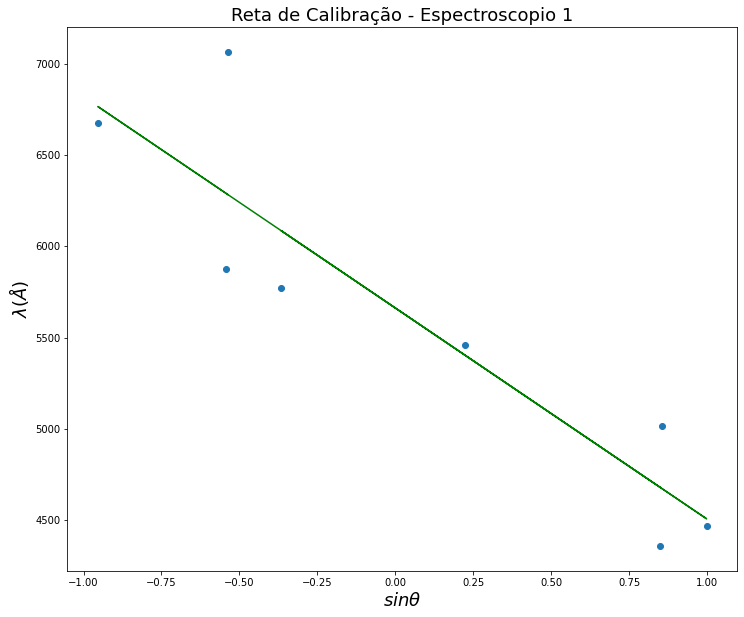

In [ ]:
print("Equação da reta: y=",np.round(a,2),"*x +", np.round(b,2))
plt.figure( figsize=(12,10))
plt.plot(xdata, yest, 'g', label = "fitted curve")
plt.scatter(xdata, ydata, label = "data")
plt.xlabel(r'$sin\theta$', fontsize=18)#r'$\sigma_i=23$'
plt.ylabel(r'$\lambda(\AA)$', fontsize=18 )
plt.title('Reta de Calibração - Espectroscopio 1', fontsize=18)

plt.show()


Lâmpada de Hidrogênio - espectro visível

Determinar a constante de Rydberg

d=1e-3/300 m

m=1

lambda=d/m *sen(theta)

In [ ]:
R_H=1.097e-3 #A
R_H

0.001097

In [ ]:
d=1e-3/300 #m
d

3.3333333333333333e-06

In [ ]:
thetag_1=7.4 #violeta 2
thetag_2=8.2 #azul-esverdeada
thetag_3=11.3 #vermelha
print("\u03B8_1 =", thetag_1,"\u00B0")
print("\u03B8_2 =", thetag_2,"\u00B0")
print("\u03B8_3 =", thetag_3,"\u00B0")

θ_1 = 7.3 °
θ_2 = 8.2 °
θ_3 = 11.3 °


In [ ]:
thetar_1= np.deg2rad(thetag_1)#violeta 2
thetar_2= np.deg2rad(thetag_2) #azul-esverdeada
thetar_3= np.deg2rad(thetag_3) #vermelha
print("\u03B8_1 =", thetar_1,"rad")
print("\u03B8_2 =", thetar_2,"rad")
print("\u03B8_3 =", thetar_3,"rad")

θ_1 = 0.1291543646475804 rad
θ_2 = 0.15009831567151233 rad
θ_3 = 0.1954768762233649 rad


In [ ]:
or1=((np.sin(thetar_1)) )
or2=((np.sin(thetar_2)) )
or3=((np.sin(thetar_3)) )
print("sen\u03B8_1 =",or1 ,"rad")
print("sen\u03B8_2 =",or2 ,"rad")
print("sen\u03B8_3 =",or3 ,"rad")
o1=np.rad2deg(or1)
o2=np.rad2deg(or2)
o3=np.rad2deg(or3)
print("\u03B8_1 =", o1,"\u00B0")
print("\u03B8_2 =", o2,"\u00B0")
print("\u03B8_3 =", o3,"\u00B0")




senθ_1 = 0.1270646086013505 rad
senθ_2 = 0.14262893370551163 rad
senθ_3 = 0.19594614424251772 rad
senθ_1 = 7.280265798339081 °
senθ_2 = 8.17203593777703 °
senθ_3 = 11.22688707695792 °


In [ ]:
l_1=(d * or1)
l_1

4.23548695337835e-07

In [ ]:
l_2=(d * or2)
l_2

4.754297790183721e-07

In [ ]:
l_3=(d * or3)
l_3

6.531538141417257e-07

In [ ]:
y1=1/l_1
y2=1/l_2
y3=1/l_3
print(y1,";",y2,";",y3,";")

2361003.6130612334 ; 2103360.0420754394 ; 1531032.9333589613 ;


In [ ]:
x1=(1/4)-(1/25)
x2=(1/4)-(1/16)
x3=(1/4)-(1/9)
print(x1,";",x2,";",x3,";")

0.21 ; 0.1875 ; 0.1388888888888889 ;


In [ ]:
x_h=np.array([x1,x2,x3]) # sen(theta)
y_h=np.array([y1,y2,y3] )# Comprimento de onda (Angtrom)

In [ ]:
xhbar = np.mean(x_h) # cálculo da média de x_h
yhbar = np.mean(y_h)  # cálculo da média de y_h


a_h = np.sum(x_h*(y_h-yhbar))/np.sum(x_h*(x_h-xhbar)) #coef. angular estimado
b_h = yhbar - a_h*xhbar #coeficiente linear estimado


yhest = a_h*x_h + b_h # função estimada

Rh_squared = np.sum((yhest-yhbar)**2)/np.sum((y_h-yhbar)**2) #coef. de determinação
print("coef. angular (a_h): ", np.round(a_h*1e-7,2),"1e7/m")
print("coeficiente linear (b_h): ", np.round(b_h,2))
print("Equação da reta: y_h=",np.round(a_h,2),"*x_h +", np.round(b_h,2))

coef. angular (a_h):  1.17 1e7/m
coeficiente linear (b_h):  -91272.83
Equação da reta: y_h= 11687816.85 *x_h + -91272.83


Equação da reta: y_h= 11687816.85 *x_h + -91272.83


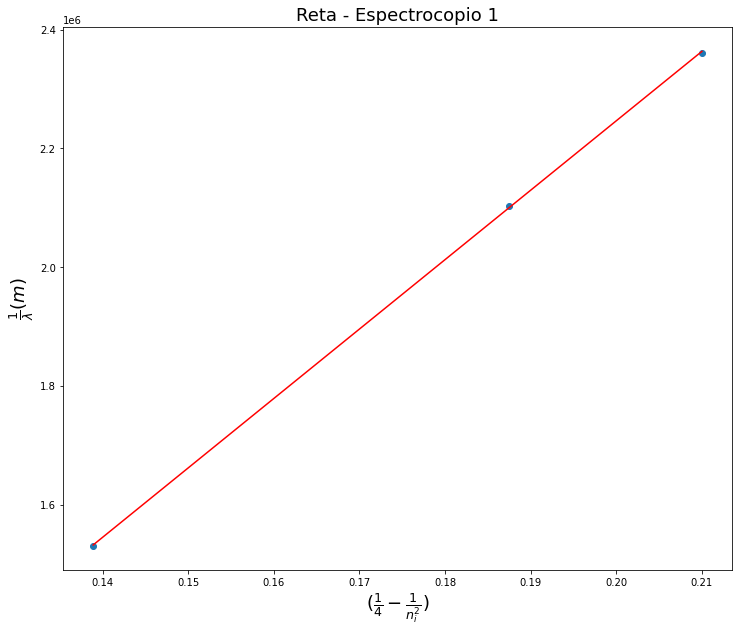

In [ ]:
print("Equação da reta: y_h=",np.round(a_h,2),"*x_h +", np.round(b_h,2))
plt.figure(figsize=(12,10))
plt.plot(x_h, yhest, 'r', label = "fitted curve")
plt.scatter(x_h, y_h, label = "data")
plt.xlabel(r'$(\frac{1}{4}-\frac{1}{n_{i}^{2}})$',fontsize=18 )
plt.ylabel(r'$\frac{1}{\lambda}(m)$',fontsize=18  )
plt.title('Reta - Espectrocopio 1',fontsize=18 )
plt.show()